# Viral Tweet Classifier
Create a K-Nearest Neighbor classifier to predict whether a tweet will go viral. 

## Revise tweets

In [1]:
import pandas as pd

all_tweets_df = pd.read_json("../data/random_tweets.json", lines=True)

print(len(all_tweets_df))
print(all_tweets_df.columns)
print(all_tweets_df.loc[0]["text"])

# Print the user and its location.
print(all_tweets_df.loc[0]["user"])
print(all_tweets_df.loc[0]["user"]["location"])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_cou

## Defining viral tweets

In [2]:
import numpy as np

median_num_retweets = all_tweets_df["retweet_count"].median()
print(f"Median number of retweets: {median_num_retweets}")
all_tweets_df["is_viral"] = np.where(all_tweets_df["retweet_count"] >= median_num_retweets, 1, 0)
print(all_tweets_df["is_viral"].value_counts())

Median number of retweets: 13.0
1    5591
0    5508
Name: is_viral, dtype: int64


## Making features

In [3]:
# Get the length of a tweet, number of followers, and number of friends.
all_tweets_df["tweet_length"] = all_tweets_df.apply(lambda tweet: len(tweet["text"]), axis=1)
all_tweets_df["followers_count"] = all_tweets_df.apply(lambda tweet: tweet["user"]["followers_count"], axis=1)
all_tweets_df["friends_count"] = all_tweets_df.apply(lambda tweet: tweet["user"]["friends_count"], axis=1)

## Normalizing the data

In [4]:
from sklearn.preprocessing import scale

labels = all_tweets_df["is_viral"]
data = all_tweets_df[["tweet_length", "followers_count", "friends_count"]]
scaled_data = scale(data, axis=0)
print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305]


## Splitting the data into training and testing set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.2, random_state=42)

print(len(x_train))
print(len(x_test))

8879
2220


## Fit the classifier and show model's score

In [6]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)
print(f"Accuracy score: {round(score * 100, 2)}%")

Accuracy score: 59.01%


## Find the best score from differing number of neighbors

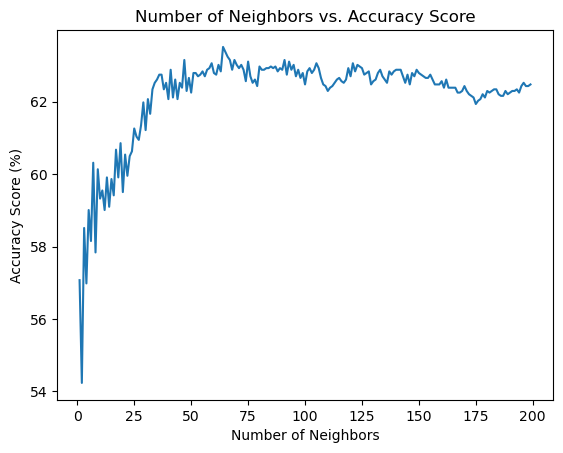

In [9]:
import matplotlib.pyplot as plt

scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    scores.append(score)
plt.plot(range(1, 200), [score * 100 for score in scores])
plt.title("Number of Neighbors vs. Accuracy Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score (%)")
plt.show()

## Conclusion
As shown in the graph, we can choose the appropriate number of neighbors from the accuracy score, making sure our model does not underfit if we choose a high k value.